## ${\textbf{Libraries}}$

In [70]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

import warnings
warnings.filterwarnings('ignore')

## ${\textbf{Import Data}}$

In [71]:
#mount drive from google

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
# Load the data, contained in the segmentation data csv file.
df = pd.read_csv('gdrive/MyDrive/segmentation_data.csv', index_col = 0)
#df= pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [73]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight.
# We do not apply any transformations or changes to the data.
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [74]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


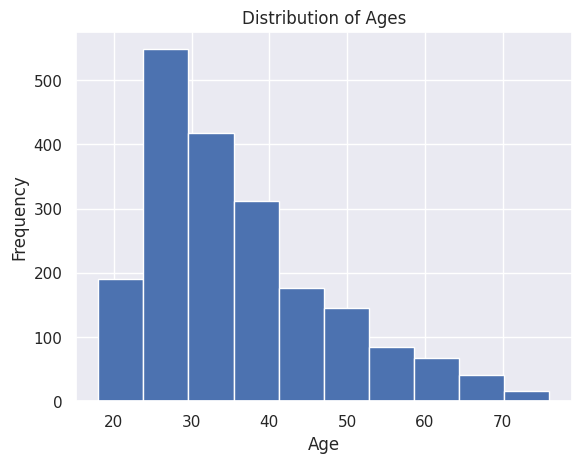

In [76]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

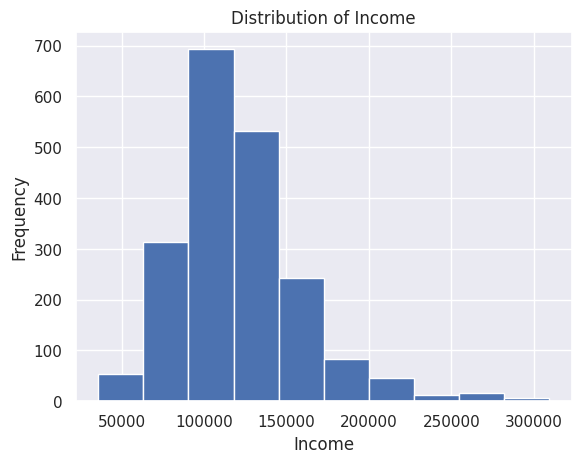

In [77]:
df['Income'].hist()
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

ID: Displays a customer's distinct identify.

Sex: A customer's biological sex, or gender. There are just two possibilities in this dataset.

0: male

1: a woman

Status married: A customer's status married.

0: one
1: not single (married, widower, separated, or divorced)

Age: The customer's age in years, determined by subtracting their birth year from the current year at the time the dataset was created.
The lowest age found in the dataset is 18 Min.
The maximum age recorded in the dataset, 76 Max,

Education: The customer's educational attainment.
0:unknown / other

1: high school

2: University

3: Postsecondary education

Income: The customer's self-reported annual income expressed in US dollars.
The dataset's lowest income, 35832 Min, was observed.
309364 Max value, which is the dataset's highest income recorded

Occupation: The customer's category of employment.

0: Jobless or unskilled

1: knowledgeable worker or official

2: officer, manager, independent contractor, and highly qualified worker

Settlement size: The size of the customer's home city.

0: a tiny city

1: a city of moderate size

2: a large city








## ${\textbf{Correlation Estimate}}$

In [78]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


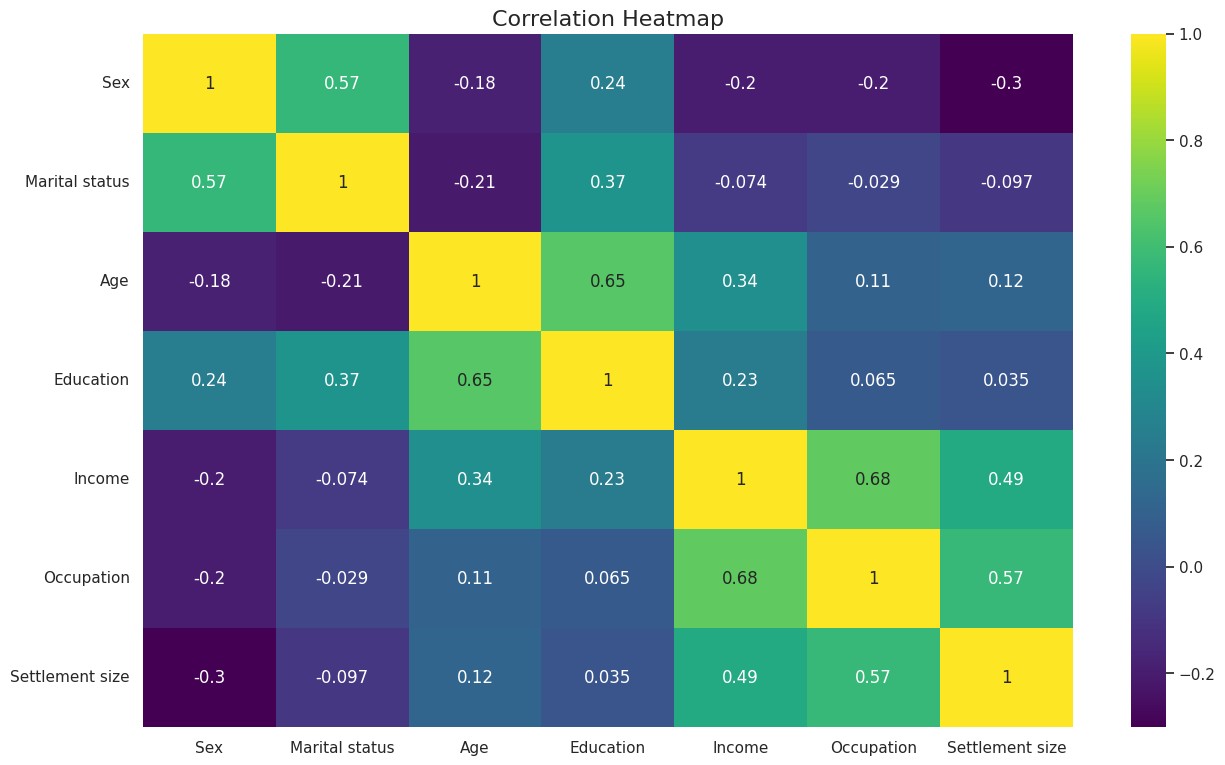

In [79]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis') # Change cmap here
plt.title('Correlation Heatmap',fontsize=16)
plt.yticks(rotation =0)
plt.show()

1.	Sex and Marital Status: There is a weak negative correlation between sex (gender) and marital status. This suggests that gender doesn’t strongly influence marital status.
2.	Age and Education: Age and education have a positive correlation, indicating that older individuals tend to have higher education levels.
3.	Income and Occupation: Income and occupation are positively correlated. People with certain occupations tend to have higher incomes.
4.	Settlement Size and Marital Status: There’s a weak negative correlation between settlement size (city size) and marital status. Larger cities may have more single individuals.
5.	Income and Age: Income and age have a positive correlation. Older individuals tend to have higher incomes.
6.	Education and Occupation: Education and occupation are positively correlated. Higher education often leads to more skilled or specialized jobs.

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

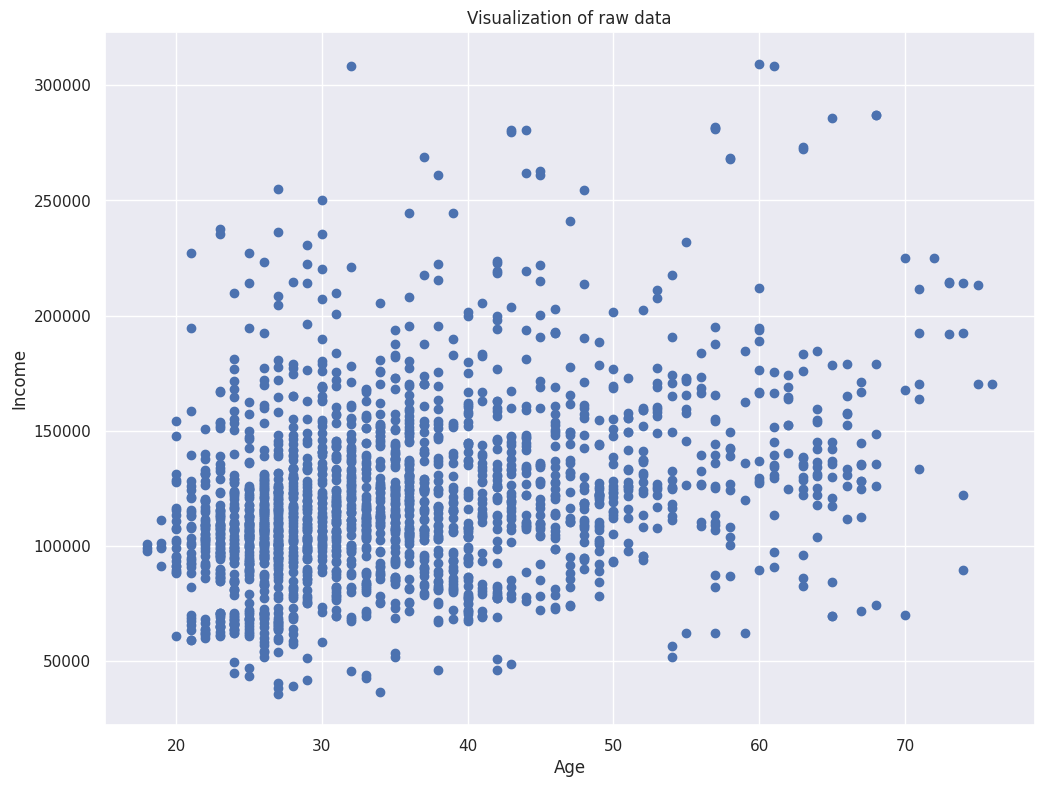

In [80]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set.
plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

For ages in the middle range (around 30 to 60), there is a wide spread of incomes represented.
As age increases beyond this middle range, particularly after age 60, the number of high-income data points decreases.
This suggests that income tends to increase with age up to a certain point before either declining or leveling off.


## ${\textbf{Standardization}}$

Standardization is a data preprocessing technique used in machine learning and statistics to transform numerical data so that it has a mean of 0 and a standard deviation of 1.

How it works:

For each feature (column) in your dataset, standardization involves these steps:

Calculate the mean: Find the average value of all the data points in that feature.
Calculate the standard deviation: Determine how spread out the data points are around the mean.
Transform each data point: Subtract the mean from each data point and then divide the result by the standard deviation.
Formula:



Many machine learning algorithms (like k-means clustering, support vector machines, and neural networks) perform better when the features have a similar scale. Here's why:

Equal weighting: Standardization ensures that all features contribute equally to the model, preventing features with larger ranges from dominating the learning process.
Gradient Descent Optimization: In algorithms that use gradient descent for optimization, standardization can help speed up the convergence to a solution.
Distance-based algorithms: For algorithms that rely on distance calculations (like k-means), standardization is crucial to ensure that all features contribute equally to the distance metric.
When to use standardization:

It's generally a good practice to standardize your data when using machine learning algorithms that are sensitive to feature scaling. However, there are exceptions, so it's always a good idea to consult the documentation of the specific algorithm you're using.

In [81]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance.
# We do not know if this is the case, so we would not like to introduce it to our model.
# This is what is also refered to as bias.
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

## ${\textbf{K-means Clustering}}$

In [82]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus.
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

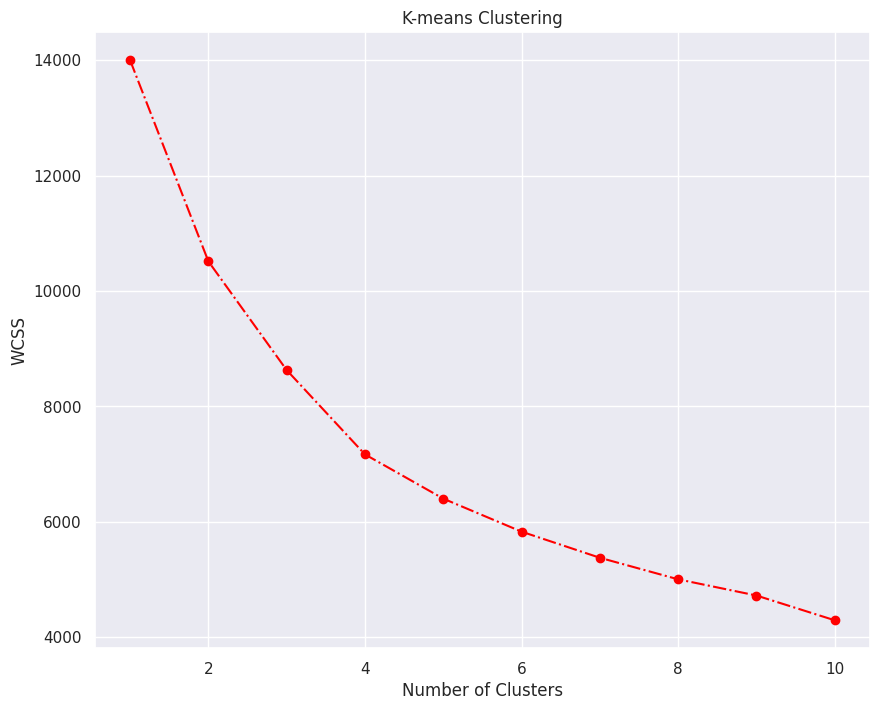

In [83]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Elbow Point Selection:
The graph shows a sharp decrease in WCSS (Within-Cluster Sum of Squares) as the number of clusters increases.

However, after a certain point (around 3 or 4 clusters), the rate of decrease becomes less significant.

This point is known as the “elbow point.”

Choosing the optimal number of clusters depends on balancing WCSS reduction and avoiding overfitting.

Optimal Number of Clusters:
In this case, the elbow point suggests that using 3 or 4 clusters would be appropriate.
Fewer clusters may lead to under-segmentation, while more clusters may lead to over-segmentation.

In [84]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [85]:
# We divide our data into the four clusters.
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{Results}}$

In [86]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [87]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [88]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


The first output table displays segment labels (0, 1, and 2) assigned to each data point.

These labels represent the clusters created by the K-means algorithm.

Characteristics of Each Cluster:

Refer to the second table labeled “segm_analysis.”

Each row corresponds to a cluster (segment).

The columns provide average values for different features within each cluster.

Interpretation:

For example, let’s consider Cluster 0:

Age: The average age in this cluster is around 55.

Education: The average education level is 2.13 (likely university or graduate school).

Income: The average income is approximately $158,338.

Occupation Score: The average occupation score is 2.65.

Settlement Size: The average settlement size is not specified.

Similar interpretations can be made for other clusters.

Segment Insights:

These insights can guide marketing strategies, product recommendations, or personalized approaches.
For instance, Cluster 0 might represent affluent, well-educated individuals.

In [89]:
df_segm_analysis.rename({0:'wealthy',
                         1:'limited-prospects',
                         2:'standard',
                         3:'career related'})


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
wealthy,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
limited-prospects,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career related,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [90]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'wealthy',
                                                                  1:'limited-propects',
                                                                  2:'standard',
                                                                  3:'career related'})

In [91]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,wealthy
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,limited-propects
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career related
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career related


In [92]:
 # We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
#x_axis = df_segm_kmeans['Age']
#y_axis = df_segm_kmeans['Income']
#plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
#plt.title('Segmentation K-means')
#plt.show()

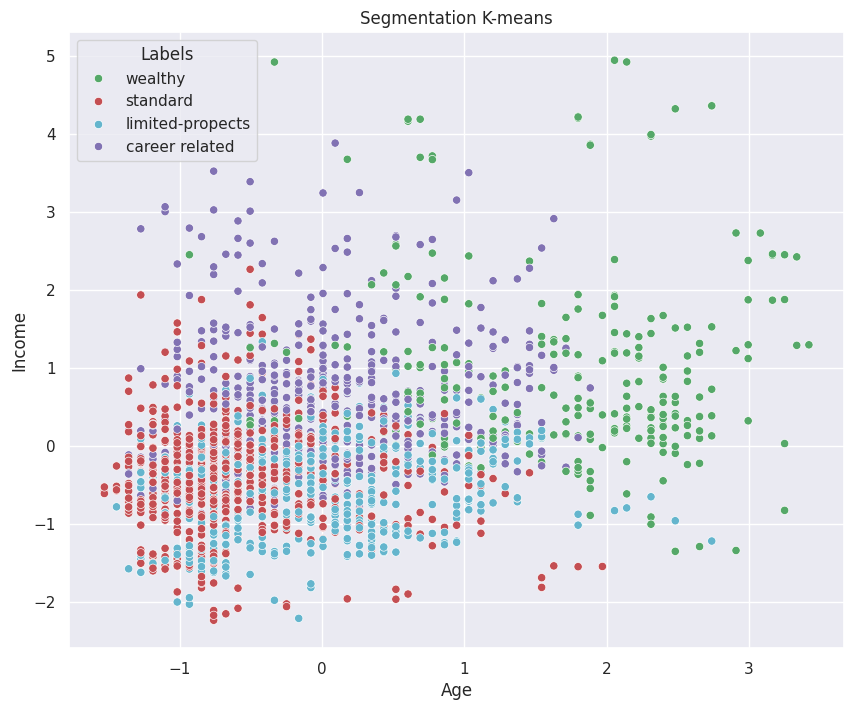

In [93]:
# We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Age', y = 'Income', hue = 'Labels', data = df_segm_kmeans, palette = ['g', 'r', 'c', 'm']) # Use x and y as keyword arguments and pass the DataFrame
plt.title('Segmentation K-means')
plt.show()

### ${\textbf{PCA}}$

In [94]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [95]:
# Fit PCA with our standardized data.
pca.fit(df_std)

PCA()

In [96]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

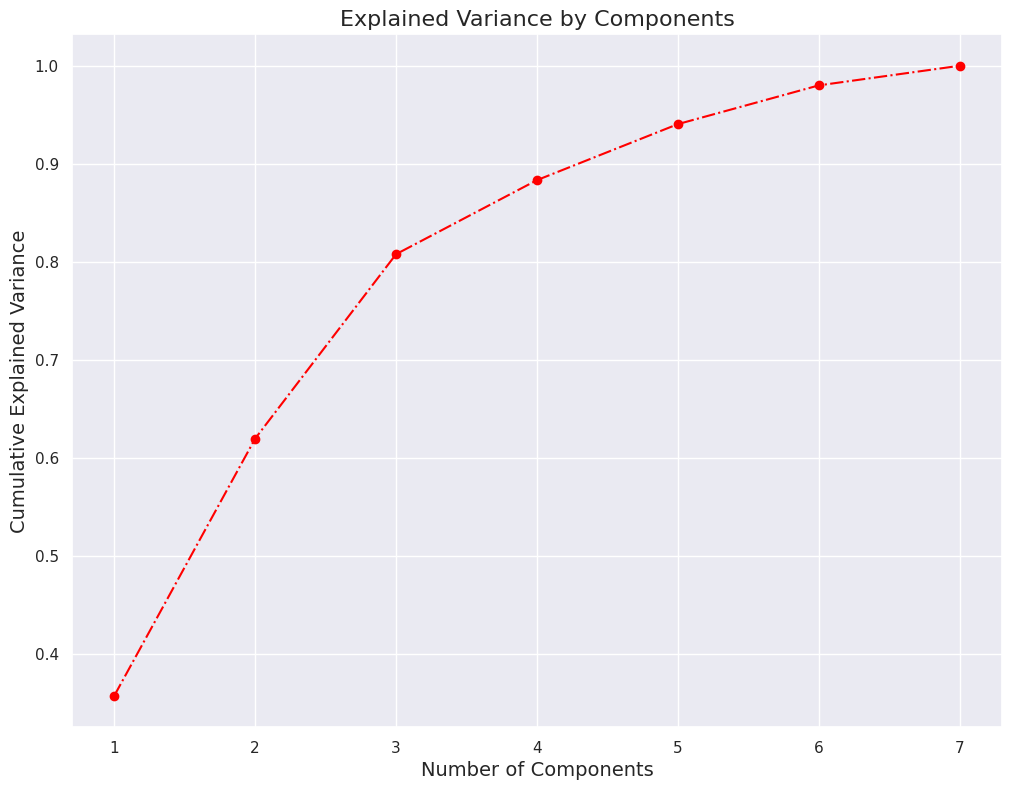

In [97]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep.
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [98]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [99]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [100]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [101]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


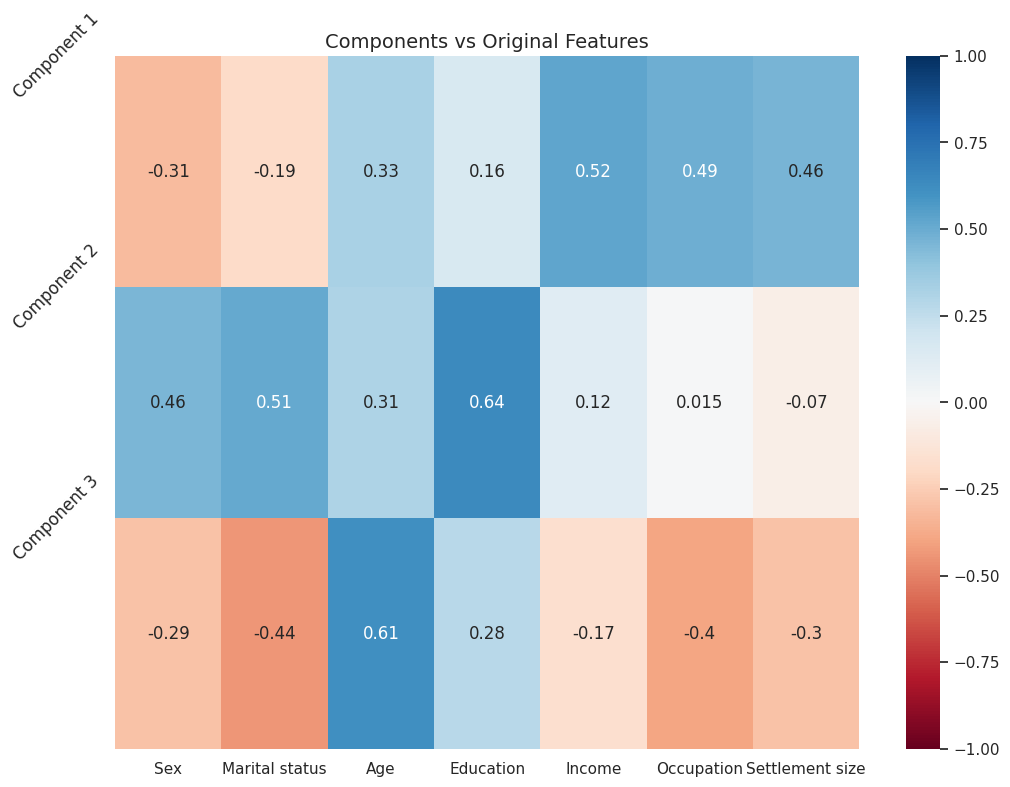

In [102]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [103]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [104]:
scores_pca = pca.transform(df_std)

### ${\textbf{K-means clustering with PCA}}$

In [105]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

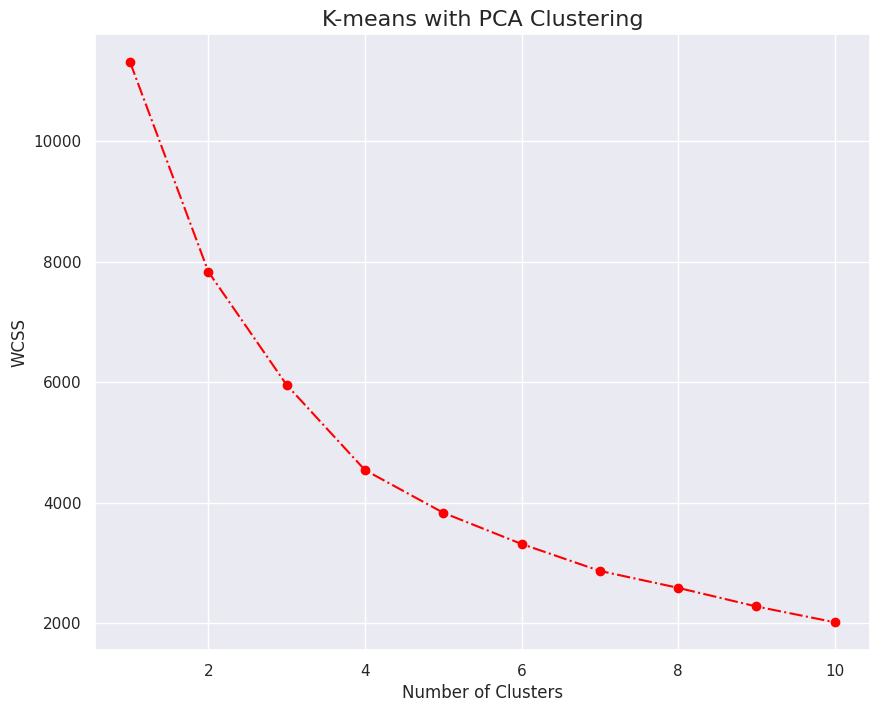

In [106]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [107]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [108]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [109]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [110]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [111]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [112]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',
                                                          1:'career related',
                                                          2:'limited-prospects',
                                                          3:'wealthy'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career related,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
limited-prospects,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
wealthy,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [113]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',
                                                          1:'career related',
                                                          2:'limited-prospects',
                                                          3:'wealthy'})

In [114]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
#x_axis = df_segm_pca_kmeans['Component 2']
#y_axis = df_segm_pca_kmeans['Component 1']
#plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
#plt.title('Clusters by PCA Components',fontsize=14)
#plt.show()

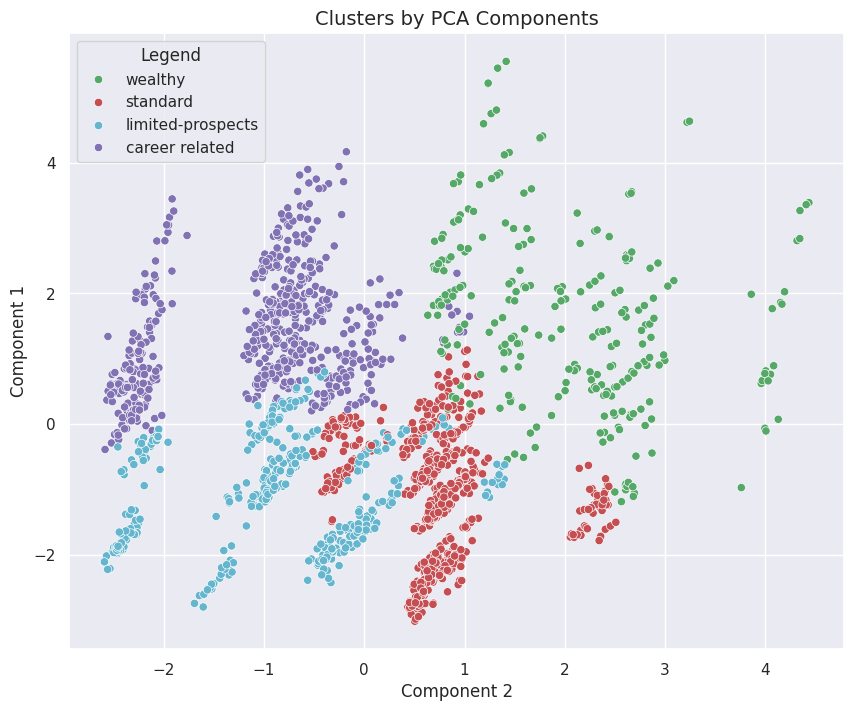

In [115]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm']) # Pass x_axis and y_axis as keyword arguments
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()

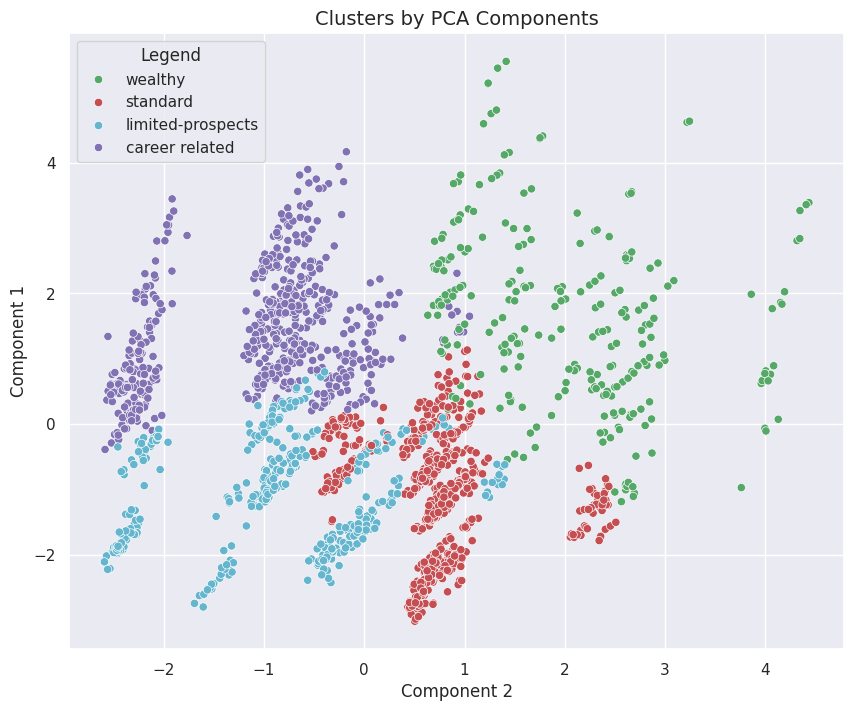

In [116]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm']) # Pass x_axis and y_axis as keyword arguments
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()

- ### Thank you !